# Labo 1 BUI


étudiants: Julien Billeter, Julien Muhlemann
date: 20:09:2024


In [32]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data_ibm.csv')
df.columns
#df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [38]:
df.sample(10)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
301,18,No,Travel_Rarely,812,Sales,10,3,Medical,1,411,4,Female,69,2,1,Sales Representative,3,Single,1200,9724,1,Y,No,12,3,1,80,0,0,2,3,0,0,0,0
412,46,No,Travel_Rarely,1485,Research & Development,18,3,Medical,1,550,3,Female,87,3,2,Manufacturing Director,3,Divorced,4810,26314,2,Y,No,14,3,3,80,1,19,5,2,10,7,0,8
223,38,No,Travel_Rarely,119,Sales,3,3,Life Sciences,1,307,1,Male,76,3,3,Sales Executive,3,Divorced,10609,9647,0,Y,No,12,3,3,80,2,17,6,2,16,10,5,13
651,47,No,Travel_Rarely,249,Sales,2,2,Marketing,1,903,3,Female,35,3,2,Sales Executive,4,Married,4537,17783,0,Y,Yes,22,4,1,80,1,8,2,3,7,6,7,7
1295,41,No,Travel_Rarely,796,Sales,4,1,Marketing,1,1815,3,Female,81,3,3,Sales Executive,3,Divorced,10447,26458,0,Y,Yes,13,3,4,80,1,23,3,4,22,14,13,5
149,19,No,Travel_Rarely,1181,Research & Development,3,1,Medical,1,201,2,Female,79,3,1,Laboratory Technician,2,Single,1483,16102,1,Y,No,14,3,4,80,0,1,3,3,1,0,0,0
982,38,No,Travel_Frequently,693,Research & Development,7,3,Life Sciences,1,1382,4,Male,57,4,1,Research Scientist,3,Divorced,2610,15748,1,Y,No,11,3,4,80,3,4,2,3,4,2,0,3
198,38,No,Travel_Rarely,1261,Research & Development,2,4,Life Sciences,1,271,4,Male,88,3,2,Manufacturing Director,3,Married,6553,7259,9,Y,No,14,3,2,80,0,14,3,3,1,0,0,0
1272,38,No,Travel_Rarely,1153,Research & Development,6,2,Other,1,1782,4,Female,40,2,1,Laboratory Technician,3,Married,3702,16376,1,Y,No,11,3,2,80,1,5,3,3,5,4,0,4
931,30,No,Non-Travel,879,Research & Development,9,2,Medical,1,1298,3,Female,72,3,2,Manufacturing Director,3,Single,4695,12858,7,Y,Yes,18,3,3,80,0,10,3,3,8,4,1,7


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your dataset

# 1. Attrition Rate by Department
attrition_rate_by_dept = df.groupby('Department')['Attrition'].value_counts(normalize=True).unstack().fillna(0)['Yes'] * 100

# 2. Average Monthly Income by Job Role and Department
avg_income_by_role_dept = df.groupby(['Department', 'JobRole'])['MonthlyIncome'].mean().unstack()

# 3. Job Satisfaction by Department
avg_job_satisfaction_by_dept = df.groupby('Department')['JobSatisfaction'].mean() * 100  # Assume job satisfaction is already on a scale of 1-5

# 4. Average Tenure (Years at Company) by Department
avg_tenure_by_dept = df.groupby('Department')['YearsAtCompany'].mean()

# 5. Average Work-Life Balance by Department
avg_work_life_balance_by_dept = df.groupby('Department')['WorkLifeBalance'].mean() * 100  # Assuming it's also on a scale of 1-5

# 6. Overtime Participation Rate by Department
overtime_rate_by_dept = df.groupby('Department')['OverTime'].value_counts(normalize=True).unstack().fillna(0)['Yes'] * 100

# 7. Average Training Times Last Year by Department
avg_training_times_by_dept = df.groupby('Department')['TrainingTimesLastYear'].mean()

# 8. Performance Rating Distribution by Department
performance_distribution_by_dept = df.groupby('Department')['PerformanceRating'].value_counts(normalize=True).unstack().fillna(0) * 100

# 9. Average Number of Companies Worked For by Department
avg_num_companies_worked_by_dept = df.groupby('Department')['NumCompaniesWorked'].mean()

# 10. Stock Option Participation by Job Level and Department
avg_stock_options_by_level_dept = df.groupby(['Department', 'JobLevel'])['StockOptionLevel'].mean().unstack()

# Gender Ratio Calculation
gender_count_by_level = df.groupby(['JobLevel', 'Gender']).size().unstack(fill_value=0)

# Calculate the ratio of males to females in percentage
gender_count_by_level['Male to Female Ratio'] = (gender_count_by_level['Male'] / gender_count_by_level['Female'].replace(0, pd.NA)).fillna(0) * 100

# Clean up the DataFrame (optional)
gender_count_by_level = gender_count_by_level[['Male', 'Female', 'Male to Female Ratio']]

# Output the results
gender_ratio_by_level = gender_count_by_level.reset_index()

# Output the KPIs
kpi_summary_by_dept = {
    "Attrition Rate (%)": attrition_rate_by_dept,
    "Avg Monthly Income by Role": avg_income_by_role_dept,
    "Job Satisfaction by Dept (%)": avg_job_satisfaction_by_dept,
    "Avg Tenure (Years at Company)": avg_tenure_by_dept,
    "Avg Work-Life Balance (%)": avg_work_life_balance_by_dept,
    "Overtime Participation Rate (%)": overtime_rate_by_dept,
    "Avg Training Times Last Year": avg_training_times_by_dept,
    "Performance Rating Distribution (%)": performance_distribution_by_dept,
    "Avg Num of Companies Worked": avg_num_companies_worked_by_dept,
    "Stock Options by Job Level": avg_stock_options_by_level_dept
}


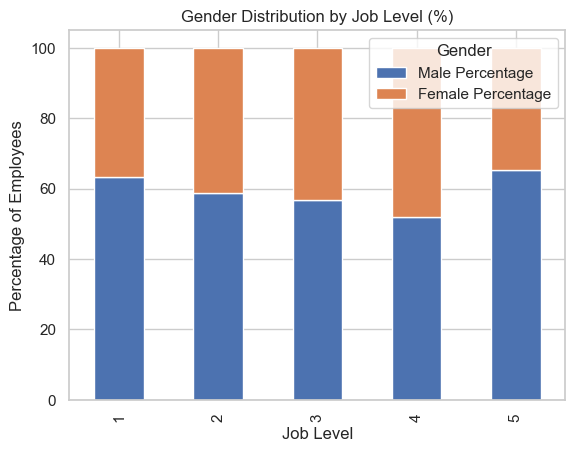

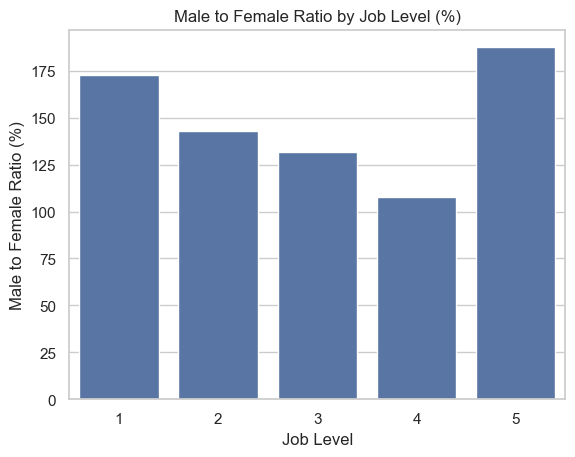

In [44]:

# Plotting the gender distribution counts as a percentage
gender_ratio_by_level['Total'] = gender_ratio_by_level['Male'] + gender_ratio_by_level['Female']
gender_ratio_by_level['Male Percentage'] = (gender_ratio_by_level['Male'] / gender_ratio_by_level['Total']) * 100
gender_ratio_by_level['Female Percentage'] = (gender_ratio_by_level['Female'] / gender_ratio_by_level['Total']) * 100

# Plotting gender distribution
gender_ratio_by_level.plot(x='JobLevel', y=['Male Percentage', 'Female Percentage'], kind='bar', stacked=True, title='Gender Distribution by Job Level (%)')
plt.xlabel('Job Level')
plt.ylabel('Percentage of Employees')
plt.legend(title='Gender')
plt.show()

# Plotting the Male to Female Ratio as a percentage
sns.barplot(x='JobLevel', y='Male to Female Ratio', data=gender_ratio_by_level)
plt.title('Male to Female Ratio by Job Level (%)')
plt.xlabel('Job Level')
plt.ylabel('Male to Female Ratio (%)')
plt.show()


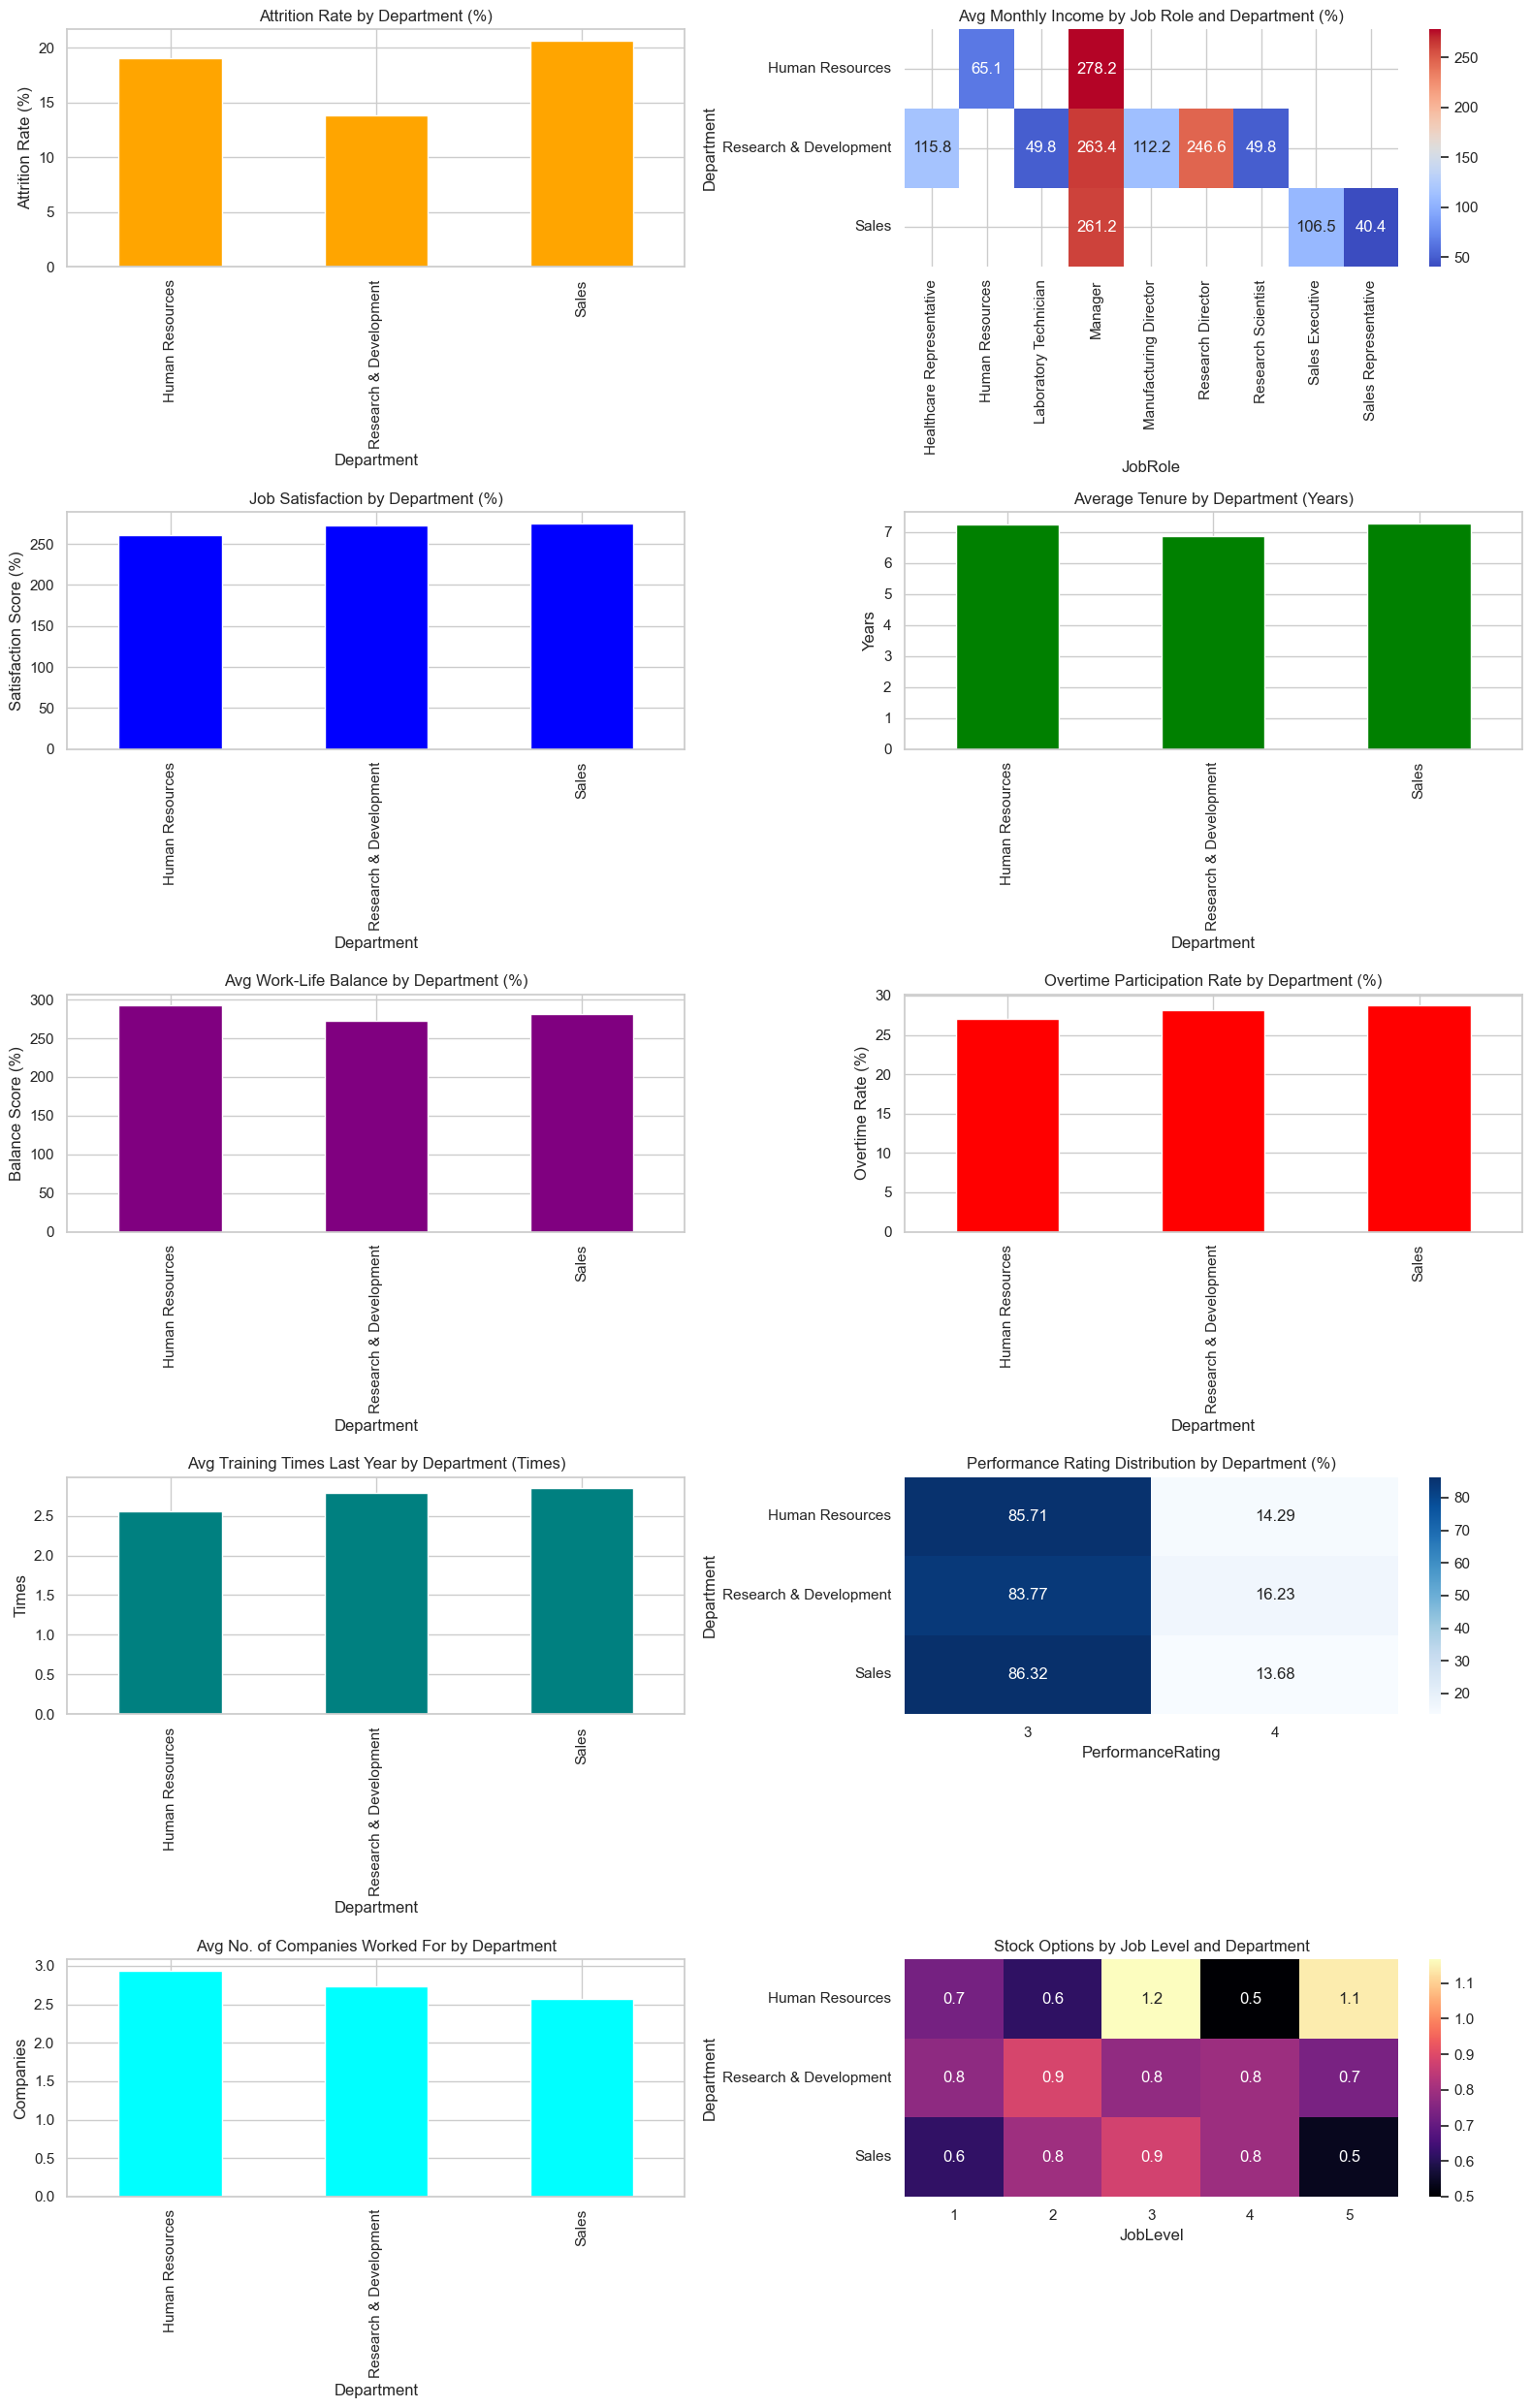

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for the plots
sns.set(style="whitegrid")

# Calculate overall average monthly income
overall_avg_income = df['MonthlyIncome'].mean()

# Convert average monthly income by department to percentage of the overall average
avg_income_by_role_dept_percentage = (avg_income_by_role_dept / overall_avg_income) * 100

# Create subplots for the KPIs
fig, axes = plt.subplots(5, 2, figsize=(16, 25))

# 1. Attrition Rate by Department
attrition_rate_by_dept.plot(kind='bar', ax=axes[0, 0], color='orange')
axes[0, 0].set_title("Attrition Rate by Department (%)")
axes[0, 0].set_ylabel('Attrition Rate (%)')
axes[0, 0].set_xlabel('Department')

# 2. Average Monthly Income by Job Role (Heatmap)
sns.heatmap(avg_income_by_role_dept_percentage, ax=axes[0, 1], annot=True, cmap='coolwarm', fmt=".1f")
axes[0, 1].set_title("Avg Monthly Income by Job Role and Department (%)")

# 3. Job Satisfaction by Department
avg_job_satisfaction_by_dept.plot(kind='bar', ax=axes[1, 0], color='blue')
axes[1, 0].set_title("Job Satisfaction by Department (%)")
axes[1, 0].set_ylabel('Satisfaction Score (%)')

# 4. Average Tenure (Years at Company) by Department
avg_tenure_by_dept.plot(kind='bar', ax=axes[1, 1], color='green')
axes[1, 1].set_title("Average Tenure by Department (Years)")
axes[1, 1].set_ylabel('Years')

# 5. Average Work-Life Balance by Department
avg_work_life_balance_by_dept.plot(kind='bar', ax=axes[2, 0], color='purple')
axes[2, 0].set_title("Avg Work-Life Balance by Department (%)")
axes[2, 0].set_ylabel('Balance Score (%)')

# 6. Overtime Participation Rate by Department
overtime_rate_by_dept.plot(kind='bar', ax=axes[2, 1], color='red')
axes[2, 1].set_title("Overtime Participation Rate by Department (%)")
axes[2, 1].set_ylabel('Overtime Rate (%)')

# 7. Average Training Times Last Year by Department
avg_training_times_by_dept.plot(kind='bar', ax=axes[3, 0], color='teal')
axes[3, 0].set_title("Avg Training Times Last Year by Department (Times)")
axes[3, 0].set_ylabel('Times')

# 8. Performance Rating Distribution by Department (Heatmap)
sns.heatmap(performance_distribution_by_dept, ax=axes[3, 1], annot=True, cmap='Blues', fmt=".2f")
axes[3, 1].set_title("Performance Rating Distribution by Department (%)")

# 9. Average Number of Companies Worked For by Department
avg_num_companies_worked_by_dept.plot(kind='bar', ax=axes[4, 0], color='cyan')
axes[4, 0].set_title("Avg No. of Companies Worked For by Department")
axes[4, 0].set_ylabel('Companies')

# 10. Stock Options by Job Level and Department (Heatmap)
sns.heatmap(avg_stock_options_by_level_dept, ax=axes[4, 1], annot=True, cmap='magma', fmt=".1f")
axes[4, 1].set_title("Stock Options by Job Level and Department")

plt.tight_layout()
plt.show()
